In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("reviews.csv") 

In [4]:
df.shape

(1000, 2)

In [5]:
df.sample(5)

,Description,Is_Response
475,My wife and I stayed here for our honeymoon. W...,happy
32,We could easily have stayed here for longer on...,happy
912,Staying at this hotel we enjoyed a relaxing an...,happy
398,GReta hotel with fantastic service! PeErfect l...,happy
72,No complaints at all. They were amazing with m...,happy


In [6]:
# Remove all rows with null values
df.dropna(axis=0, inplace=True)

In [7]:
df.shape

(1000, 2)

In [8]:
# Change Is_Response to 0 for no happy and 1 for happy
df['Is_Response'].replace(['happy','not happy'],[1,0], inplace=True)

In [9]:
df.sample(5)

,Description,Is_Response
873,Another of my frequent hotels for business. Th...,1
35,"Booked - rooms, at check-in they upgraded all ...",1
324,Fantastic location. Friendly & knowledgeable s...,1
527,These spacious suites will spoil you. Super Cl...,1
383,Ok first impression as you get off the exit is...,1


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [11]:
X = df['Description']
y = df['Is_Response']

In [12]:
# tf-idf means term-frequency times inverse document-frequency. 
tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
tfidf.fit(X)
features = tfidf.transform(X)

In [13]:
features.shape

(1000, 8212)

In [14]:
features.toarray()[:10,1000:1010]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.09434825, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=20)

In [16]:
clf = LogisticRegression().fit(X_train,y_train)

In [17]:
### Train accuracy
clf.score(X_train,y_train)

0.8925

In [18]:
y_pred = clf.predict(X_test)
print("Accuracy Score:",clf.score(X_test,y_test))  

Accuracy Score: 0.79


In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 28  42]
 [  0 130]]


In [20]:
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        70
           1       0.76      1.00      0.86       130

    accuracy                           0.79       200
   macro avg       0.88      0.70      0.72       200
weighted avg       0.84      0.79      0.76       200



Text(0.5, 15.0, 'Predicted')

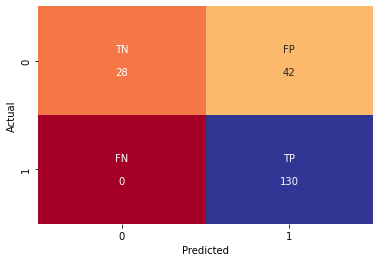

In [21]:
group_counts = [f"{value:0.0f}" for value in  cm.flatten()]
group_names = ['TN','FP', 'FN','TP']
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.array(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", cmap='RdYlBu',cbar=False)
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")

### Predict for new data

In [22]:
# tfidf.vocabulary_

In [34]:
# Predict whether the given review is positive or negative 
docs = ["This is very good",
        "Bad room service",
        "Food was awesome"]
# Tfidf
features = tfidf.transform(docs)
print(features.shape)
print(clf.predict(features))

(3, 8212)
[1 0 1]


## Text classification using BernoulliNB

In [35]:
# tf-idf means term-frequency times inverse document-frequency. 
tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
features = tfidf.fit_transform(X).toarray()

In [25]:
#tfidf.vocabulary_.items()

In [26]:
features.shape

(1000, 8212)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=20)

In [28]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB().fit(X_train,y_train)

In [29]:
bnb.score(X_train,y_train)

0.84375

In [30]:
y_pred = bnb.predict(X_test)
print("Accuracy Score:",bnb.score(X_test,y_test))  

Accuracy Score: 0.745


[[ 28  42]
 [  9 121]]


Text(0.5, 15.0, 'Predicted')

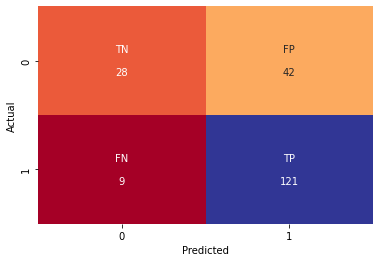

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
group_counts = [f"{value:0.0f}" for value in  cm.flatten()]
group_names = ['TN','FP', 'FN','TP']
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.array(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", cmap='RdYlBu',cbar=False)
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")